Howework 2- Justin Talbot

Q1

In [1]:
import wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

100% [..........................................................................] 1423529 / 1423529

'housing (1).csv'

In [2]:
import pandas as pd
df_raw = pd.read_csv('housing.csv')

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

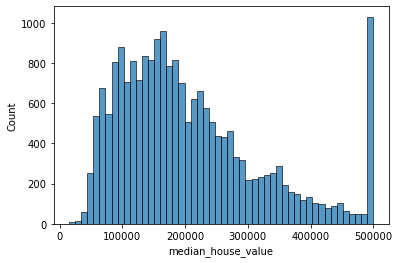

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.histplot(df_raw.median_house_value, bins=50)

median_house_value has a long tail (right-skewed)

In [44]:
df = df_raw[
    df_raw['ocean_proximity'].isin(["INLAND","<1H OCEAN"])
]

In [45]:
df = df.drop("ocean_proximity", axis=1)

Q1

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Q2

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,15687.000000,15687.000000,15687.000000,15687.000000,15530.000000,15687.000000,15687.000000,15687.000000,15687.000000
mean,-119.217442,35.467307,27.188118,2665.677312,541.244688,1466.317205,500.916491,3.804019,191943.020017
std,1.780380,2.066387,12.057128,2257.672743,435.650018,1180.389908,392.759399,1.857158,108801.077620
min,-124.140000,32.610000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.070000,33.940000,17.000000,1441.000000,295.000000,802.000000,278.000000,2.520800,111300.000000
50%,-118.370000,34.160000,27.000000,2118.000000,432.000000,1195.000000,406.000000,3.468800,166900.000000
75%,-117.990000,37.340000,36.000000,3172.000000,645.000000,1777.000000,602.000000,4.686200,241100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
import numpy as np
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)

In [9]:
np.random.seed(42)
np.random.shuffle(idx)

In [10]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [11]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [12]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [14]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Q3

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

Fill with 0

In [16]:
df_train.isnull().sum()

longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        94
population             0
households             0
median_income          0
dtype: int64

In [17]:
df_train_fill0 = df_train[base].fillna(0).values

In [18]:
w0, w = train_linear_regression(df_train_fill0, y_train)

In [19]:
y_pred = w0 + df_train_fill0.dot(w)

<AxesSubplot:ylabel='Count'>

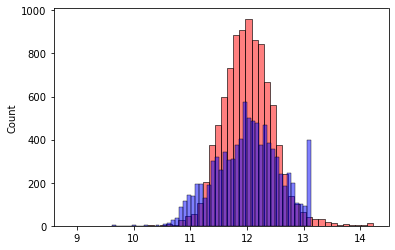

In [20]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)
rmse(y_train, y_pred)

0.34027197158295336

In [22]:
rmse_fill0 = rmse(y_train, y_pred)

Fill with mean

In [23]:
df_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,9413.000000,9413.000000,9413.000000,9413.000000,9319.000000,9413.000000,9413.000000,9413.000000
mean,-119.212927,35.454722,27.201955,2677.726548,542.552956,1476.874217,502.084458,3.806246
std,1.771609,2.055953,12.078381,2331.116250,443.541176,1240.747776,401.750466,1.854068
min,-124.140000,32.640000,1.000000,2.000000,2.000000,5.000000,2.000000,0.499900
25%,-121.050000,33.940000,17.000000,1437.000000,294.000000,799.000000,276.000000,2.531300
50%,-118.370000,34.160000,27.000000,2104.000000,431.000000,1190.000000,405.000000,3.458300
75%,-117.990000,37.330000,36.000000,3184.000000,646.000000,1784.000000,604.000000,4.673100
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100


In [24]:
tb_mean = 542.552956

In [25]:
df_train_fillmean = df_train[base].fillna(tb_mean).values

In [26]:
w0, w = train_linear_regression(df_train_fillmean, y_train)

In [27]:
y_pred = w0 + df_train_fillmean.dot(w)

<AxesSubplot:ylabel='Count'>

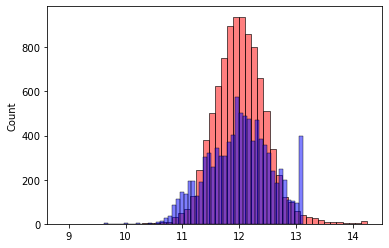

In [28]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [29]:
rmse(y_train, y_pred)

0.3400300822262613

In [30]:
rmse_fillmean = rmse(y_train, y_pred)

In [31]:
round(rmse_fill0,2)

0.34

In [32]:
round(rmse_fillmean,2)

0.34

They're roughly the same!

Q4

In [33]:
df_train = df_train[base].fillna(0).values

In [34]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [35]:
scores = {}
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(df_train, y_train, r)
    y_pred = w0 + df_train.dot(w)
    scores[r] = round(rmse(y_train, y_pred),2)

In [36]:
scores

{0: 0.34,
 1e-06: 0.34,
 0.0001: 0.34,
 0.001: 0.34,
 0.01: 0.34,
 0.1: 0.34,
 1: 0.34,
 5: 0.35,
 10: 0.35}

Min is 0.34, let's go with r = 0

Q5

In [37]:
scores = {}
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    df_train = df_train[base].fillna(0).values
    
    w0, w = train_linear_regression_reg(df_train, y_train, 0)
    y_pred = w0 + df_train.dot(w)
    scores[seed] = rmse(y_train, y_pred)

In [38]:
np.std(list(scores.values()))

0.0021025498180169753

Q6

In [59]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_full_train = np.log1p(df_full_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_full_train['median_house_value']
del df_test['median_house_value']

df_full_train = df_full_train[base].fillna(0).values
df_test = df_test[base].fillna(0).values

w0, w = train_linear_regression_reg(df_full_train, y_full_train, 0.001)
y_pred = w0 + df_test.dot(w)
rmse(y_test, y_pred)

0.33498993366064994